## Notebook to explore SimplyP output in more detail

In [1]:
% matplotlib notebook
import pandas as pd, numpy as np, matplotlib.pyplot as plt

### Compare output from different model versions

In [23]:
old_in = r'C:\Data\SimplyP_Local\Temp\Output\Results_TC_SC1_Old_NotDynamic.csv'
new_in = r'C:\Data\SimplyP_Local\Temp\Output\Results_TC_SC1.csv'

tc_old_df = pd.read_csv(old_in, index_col=0)
tc_old_df = tc_old_df.add_suffix('_old')

tc_new_df = pd.read_csv(new_in, index_col=0)

tc_old_df.head()

,C_cover_A_old,D_snow_old,EPC0_A_kgmm_old,EPC0_A_mgl_old,EPC0_NC_kgmm_old,P_labile_A_old,P_labile_NC_old,Plabile_A_mgkg_old,Qg_old,Qq_old,QsA_old,QsS_old,TDPs_A_old,TDPs_A_mgl_old,TDPs_NC_old,Vg_old,VsA_old,VsS_old
Date,,,,,,,,,,,,,,,,,,
1985-01-01,0.5,50.0,30.0,0.3,0.0,3135000.0,0.0,330.0,0.197247,0.0,0.0,0.0,6000.0,0.3,0.0,3.944939,200.0,200.0
1985-01-02,0.5,50.0,30.0,0.3,0.0,3135000.0,0.0,330.0,0.190246,0.0,0.0,0.0,6000.0,0.3,0.0,3.804918,200.0,200.0
1985-01-03,0.5,50.0,30.0,0.3,0.0,3135000.0,0.0,330.0,0.190246,0.0,0.0,0.0,6000.0,0.3,0.0,3.804918,200.0,200.0
1985-01-04,0.5,50.0,30.0,0.3,0.0,3135000.0,0.0,330.0,0.190246,0.0,0.0,0.0,6000.0,0.3,0.0,3.804913,200.0,200.0
1985-01-05,0.5,50.1,30.0,0.3,0.0,3135000.0,0.0,330.0,0.190246,0.0,0.0,0.0,6000.0,0.3,0.0,3.804913,200.0,200.0


(-0.004364755813661247, 4.055525713473332)

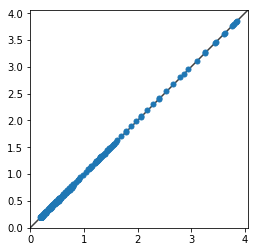

In [25]:
fig, ax = plt.subplots()
ax.scatter(tc_old_df['Qg_old'].values, tc_new_df['Qg'].values,
           s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

# plt.plot(x1=minQ,x2=maxQ,y1=minQ,y2=maxQ, ls='line')

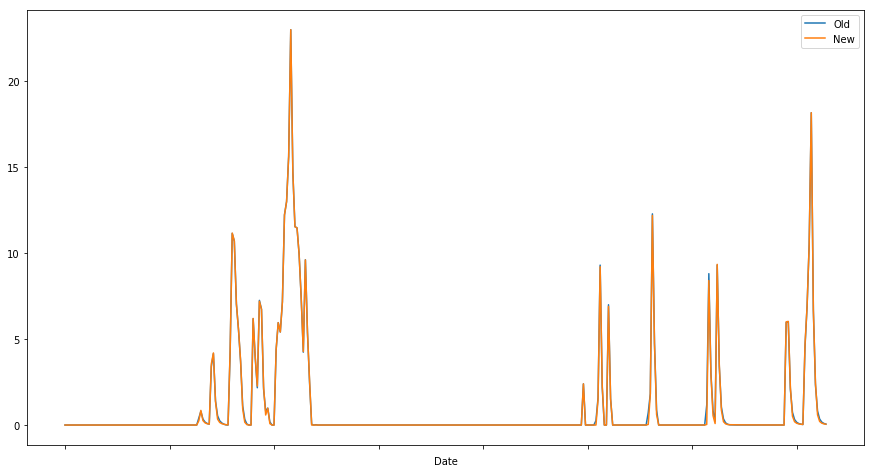

In [18]:
ax = tc_old_df['QsA_old'].plot(figsize=(15,8), label='Old')
tc_new_df['QsA'].plot(ax=ax, label='New')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


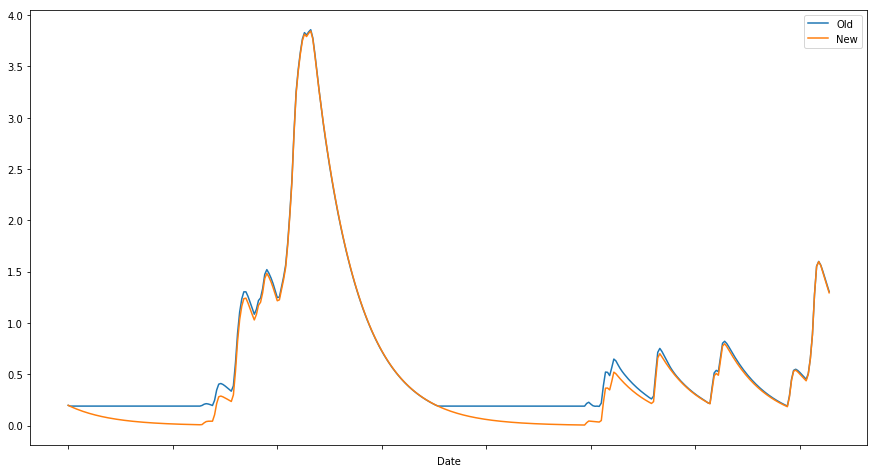

In [19]:
ax = tc_old_df['Qg_old'].plot(figsize=(15,8), label='Old')
tc_new_df['Qg'].plot(ax=ax, label='New')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

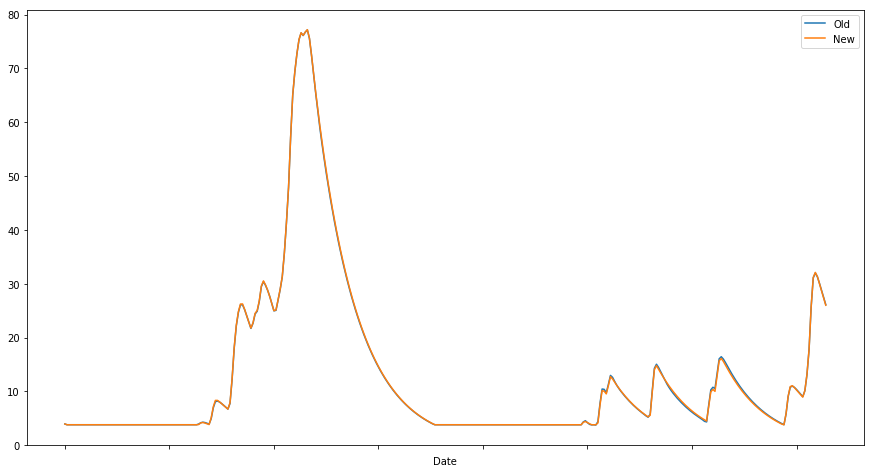

In [24]:
ax = tc_old_df['Vg_old'].plot(figsize=(15,8), label='Old')
tc_new_df['Vg'].plot(ax=ax, label='New')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

### Comparing end of day values and daily mean values

Copy and paste the lines of code below into the main notebook which runs the model.

In summary, find that results are very similar, only the end of day values are more peaky. As expected. If the variable being simulated changes rapidly compared to the daily time step, expect more of a difference between end of day values and daily mean values (seen), than if the change is only slow (e.g. groundwater flow).

In [ ]:
df_R_dict[1][['Qr_EndOfDay','Qr']].plot(figsize=(10,5))
plt.ylabel('Discharge (mm/day)')

df_R_dict[1]['PPr_out_eod'] = df_R_dict[1]['PPr_EndOfDay']*df_R_dict[1]['Qr_EndOfDay']/df_R_dict[1]['Vr']
df_R_dict[1]['PP_mgl_eod'] = (df_R_dict[1]['PPr_out_eod']/df_R_dict[1]['Qr_EndOfDay'])/p_SC.loc['A_catch',1]

df_R_dict[1][['PPr_out_eod','Flux_PPr']].plot(figsize=(10,5))

df_R_dict[1][['PP_mgl_eod','PP_mgl']].plot(figsize=(10,5))                                                              

### Other simplifications

As an aside, I plotted just the daily fluxes of TDP and PP together for the first time recently (Jan 2019), and saw that they are extremely similar. Which means that a much simpler setup could be to just have in-stream TDP also as a function of Q, as PP is. Of course then you loose the predictive ability to simulate effects of changes in terrestrial P inputs, but if you're not interested in this, then it looks like this simplification would be appropriate.

In [ ]:
df_R_dict[1][['Flux_TDPr','Flux_PPr']].plot(figsize=(10,5))

### Impact of discretization of soil P equations

In [2]:
infile = r'C:\Data\SimplyP_Local\Temp\Output\Results_TC_SC1_Compare_SoilP_Discretization.csv'
disc_df = pd.read_csv(infile, index_col=0, parse_dates=True)
disc_df.head()

,C_cover_A,D_snow,EPC0_A_kgmm,EPC0_A_mgl,EPC0_NC_kgmm,P_labile_A,P_labile_A_disc,P_labile_NC,Plabile_A_mgkg,Qg,Qq,QsA,QsS,TDPs_A,TDPs_A_disc,TDPs_A_mgl,TDPs_NC,Vg,VsA,VsS
Date,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.2,0.00,5.170000,0.100000,0.000000,2.873361e+06,2.873367e+06,-70.784751,585.027085,1.152735,0.0392,0.391975,0.090717,1507.105593,1507.108907,0.100005,-0.037158,74.927802,291.496283,291.588119
1981-01-02,0.2,0.00,5.170239,0.100005,-0.000127,2.873502e+06,2.873507e+06,-141.569506,585.055811,1.137276,0.0080,0.261843,0.089992,1506.040501,1506.040022,0.100010,-0.074296,73.922957,291.275976,291.582876
1981-01-03,0.2,0.00,5.170493,0.100010,-0.000255,2.873629e+06,2.873641e+06,-212.353265,585.081823,1.126384,0.0596,1.471550,0.393363,1514.727690,1514.730802,0.100014,-0.112332,73.214967,292.943099,293.933633
1981-01-04,0.2,4.72,5.170723,0.100014,-0.000382,2.873773e+06,2.873780e+06,-283.137901,585.110970,1.116219,0.0000,0.517938,0.326710,1508.263533,1508.261294,0.100019,-0.149431,72.554213,291.678422,293.267095
1981-01-05,0.2,8.86,5.170981,0.100019,-0.000509,2.873916e+06,2.873921e+06,-353.922662,585.140117,1.102386,0.0000,0.162974,0.261518,1505.169968,1505.168695,0.100024,-0.186400,71.655077,291.065668,292.664889


<IPython.core.display.Javascript object>


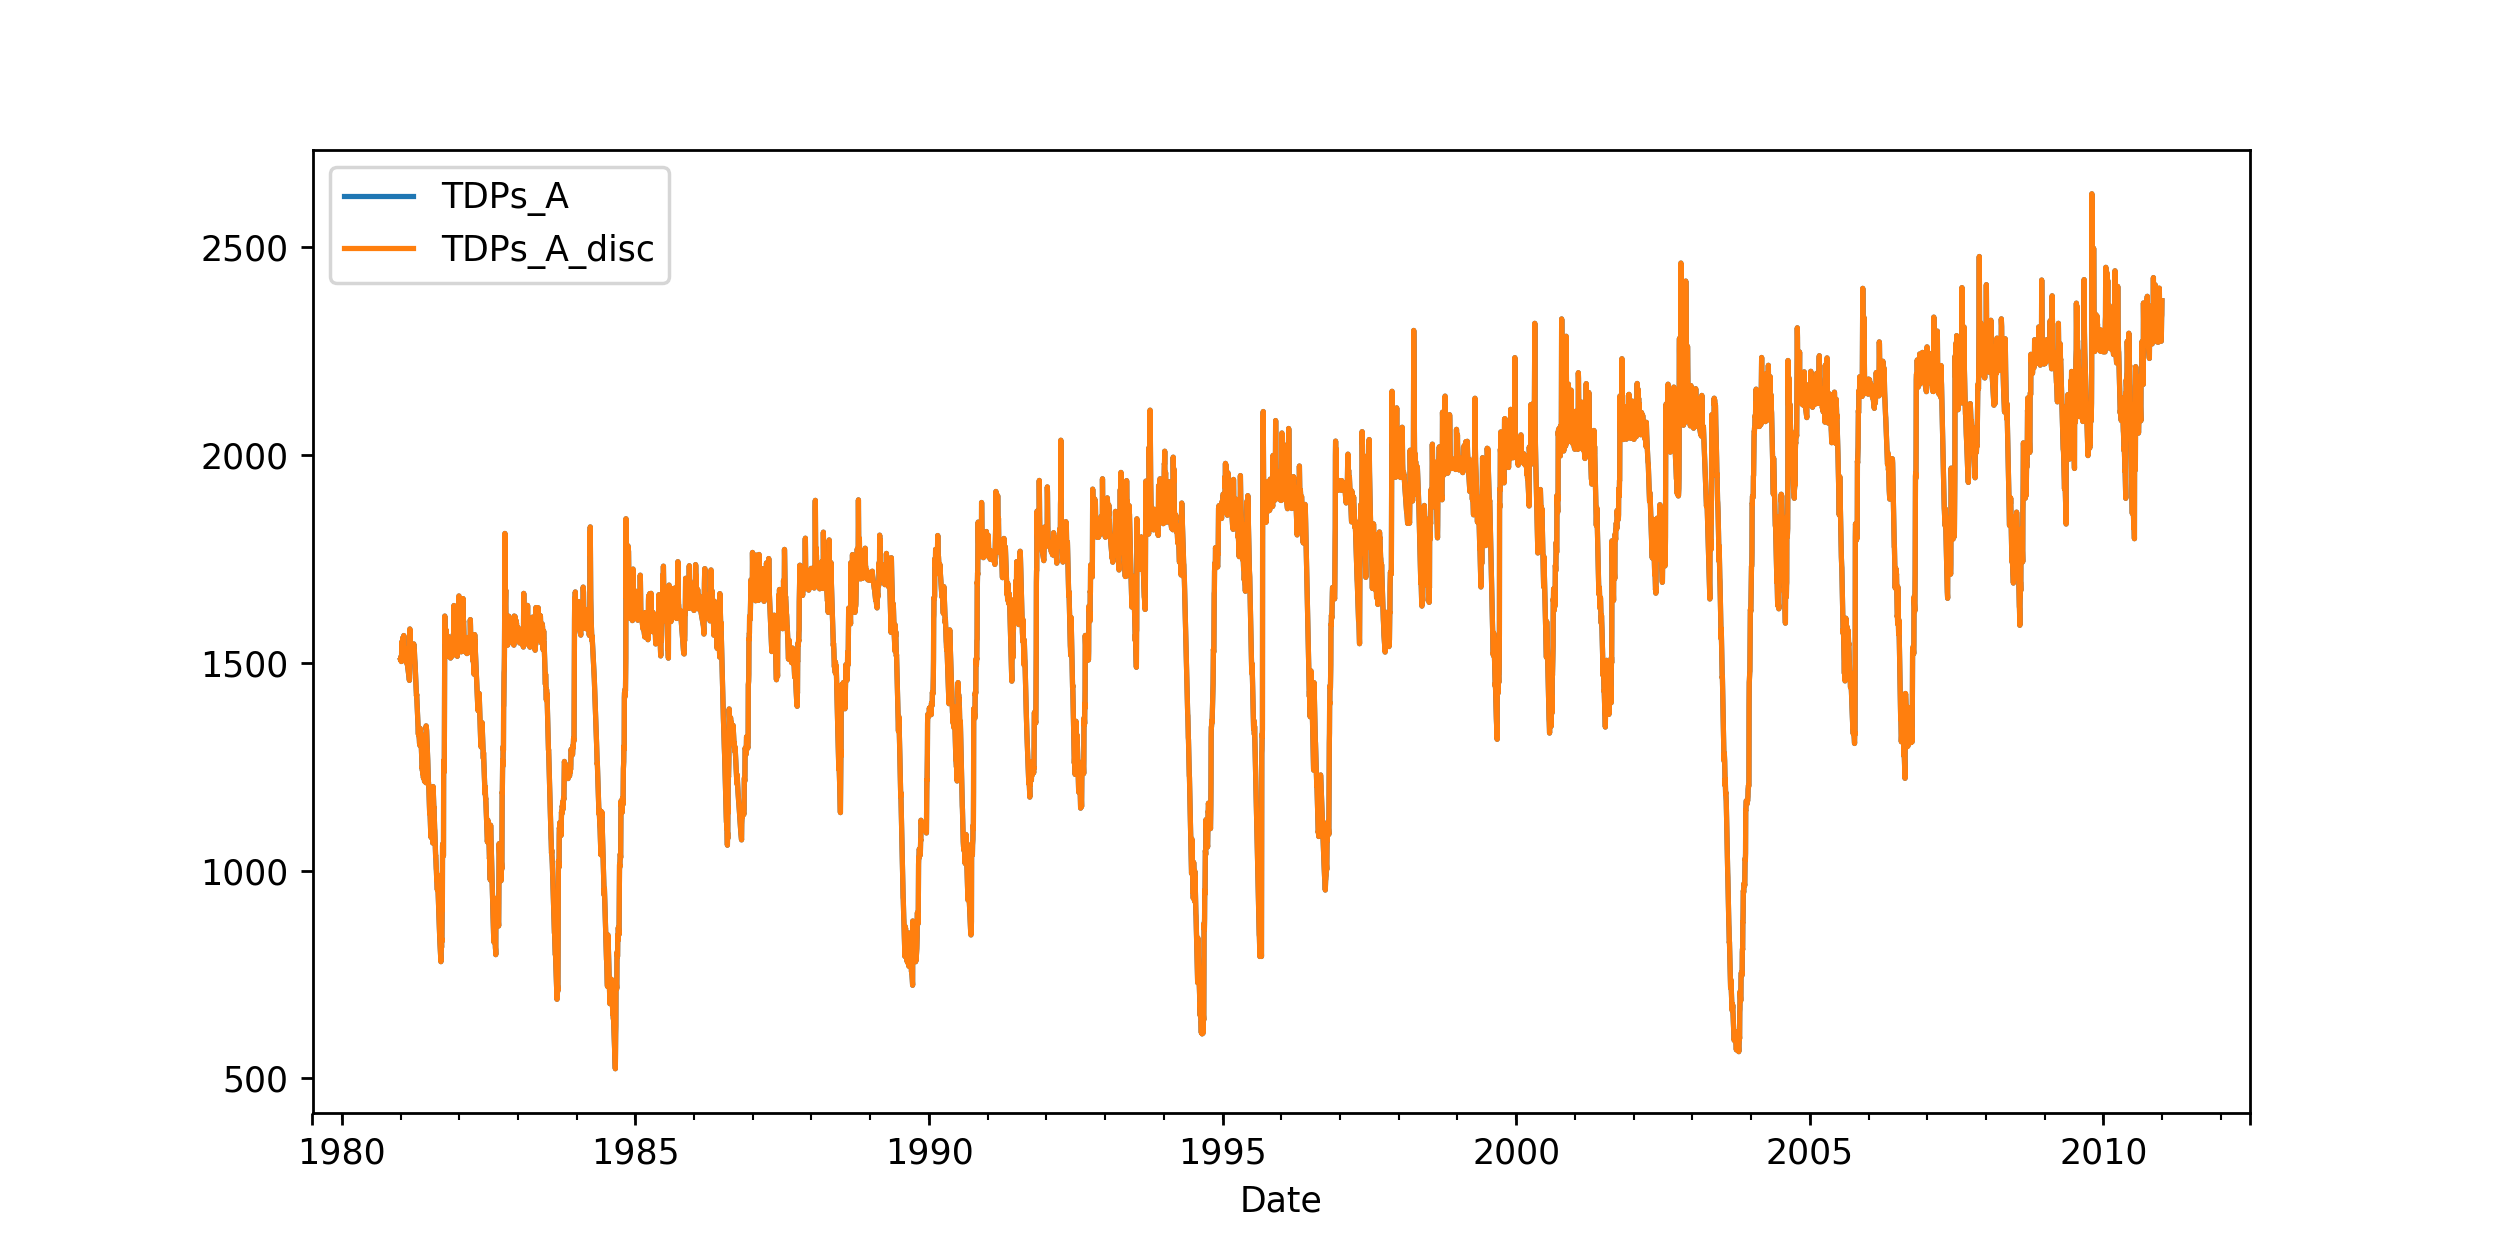

In [3]:
disc_df[['TDPs_A','TDPs_A_disc']].plot(figsize=(10,5))

<IPython.core.display.Javascript object>


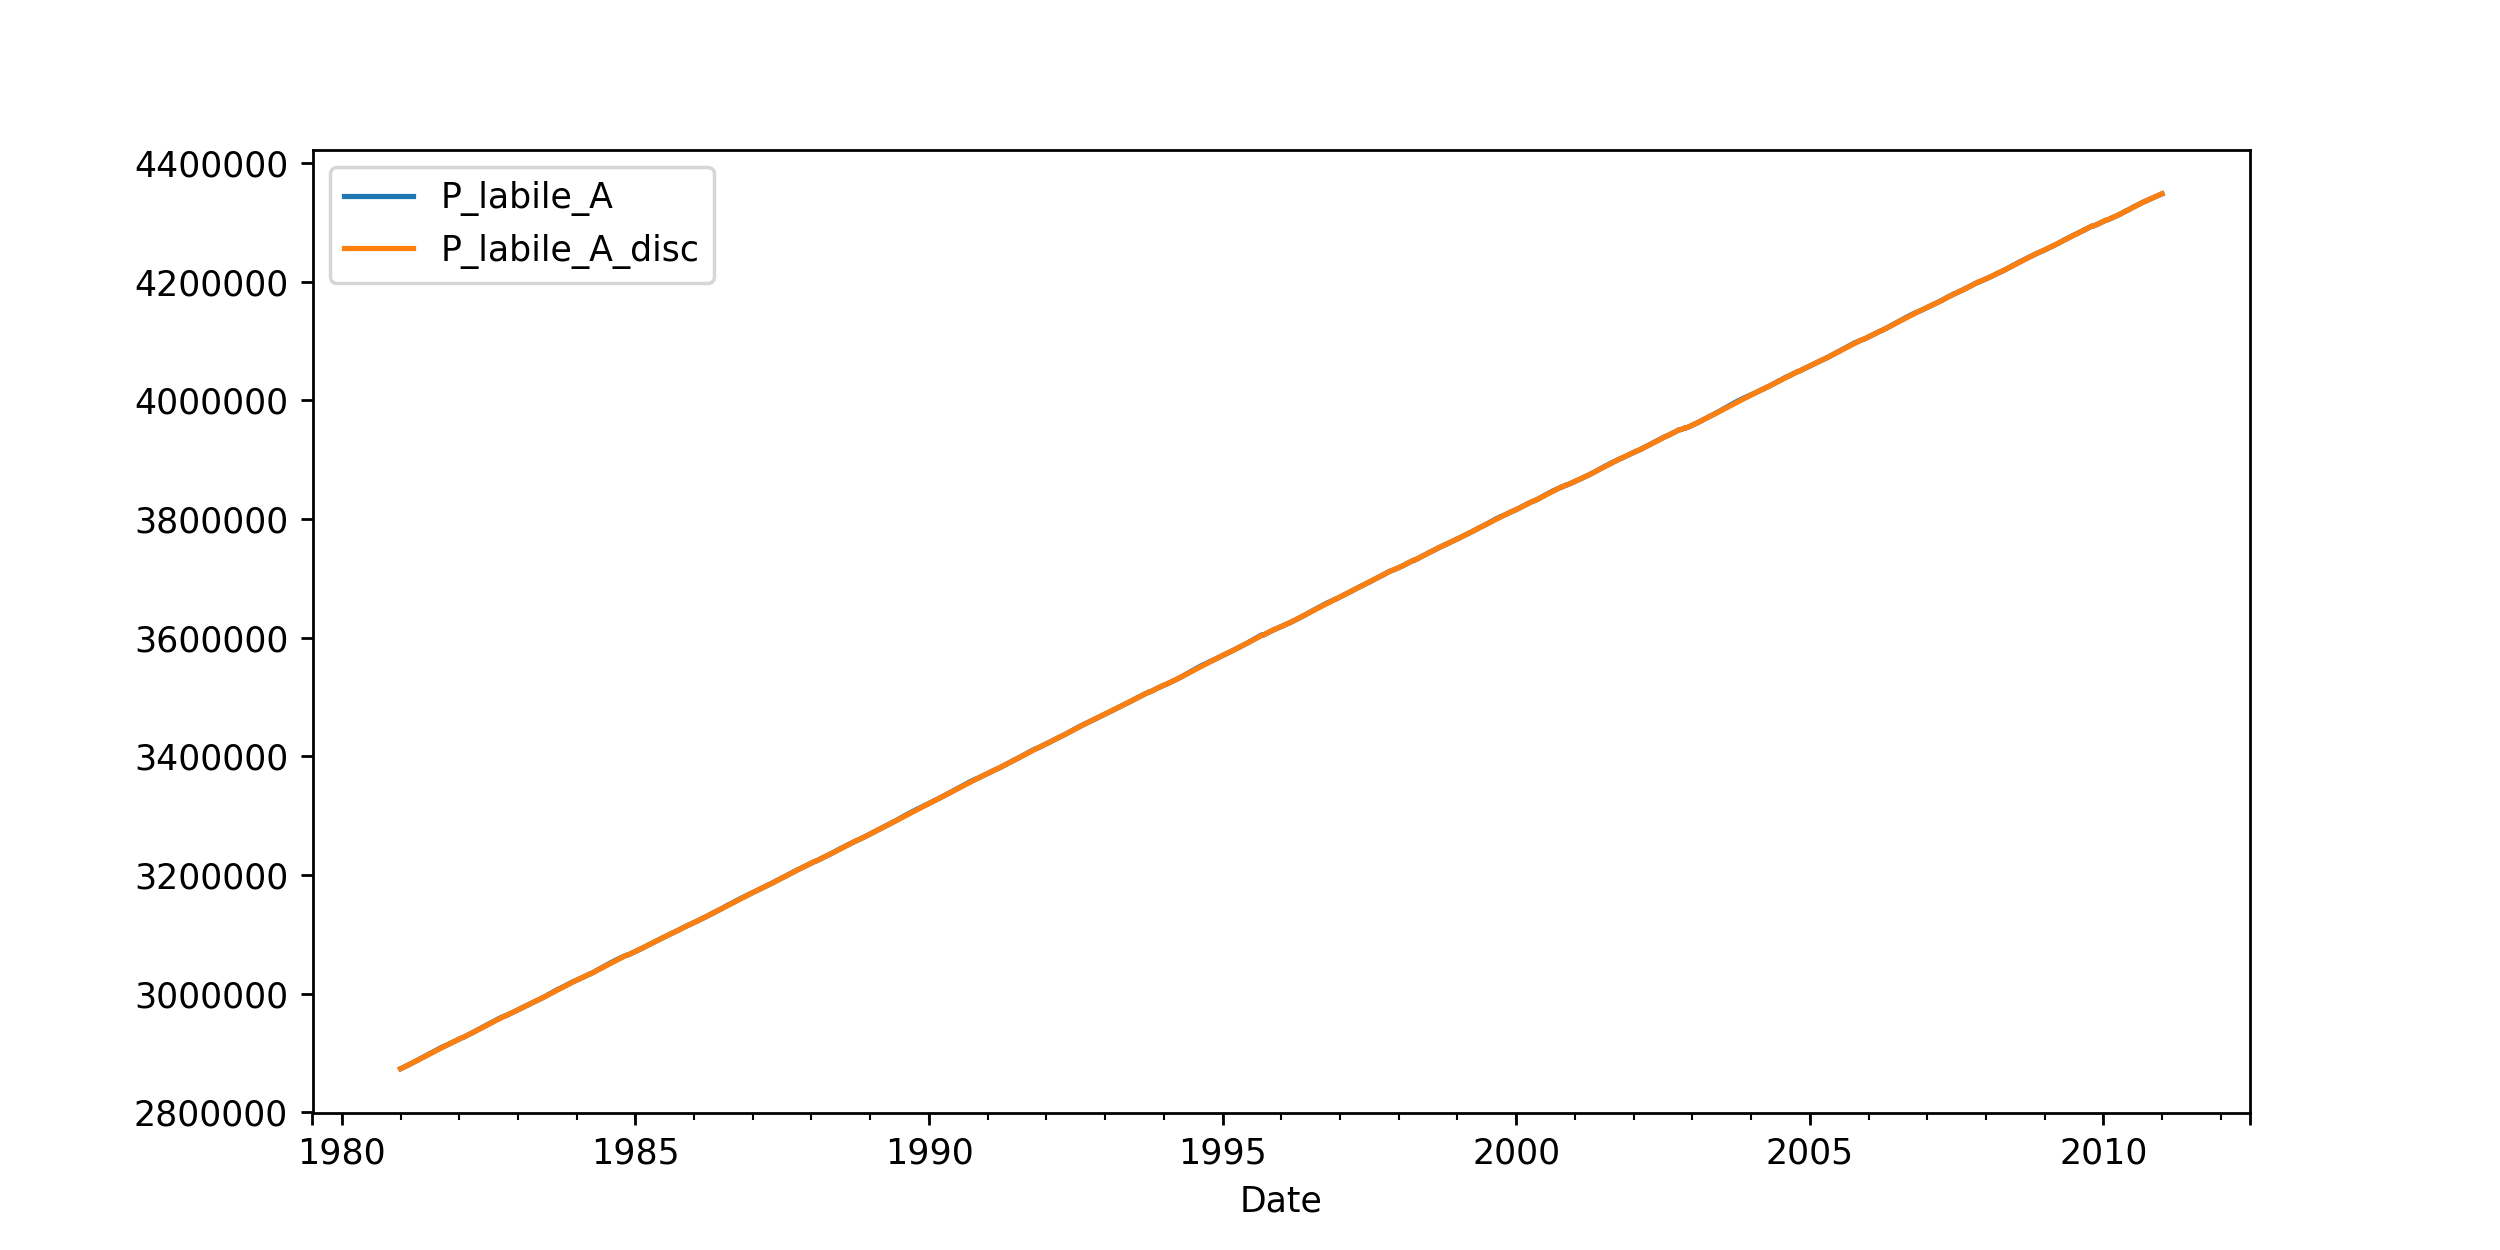

In [4]:
disc_df[['P_labile_A','P_labile_A_disc']].plot(figsize=(10,5))

(2799609.9167620293, 4422263.868190027)

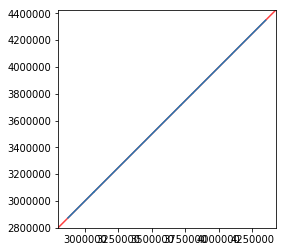

In [29]:
fig, ax = plt.subplots()
plt.plot(disc_df['P_labile_A'],disc_df['P_labile_A_disc'])
ax.set_aspect('equal')


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

<IPython.core.display.Javascript object>


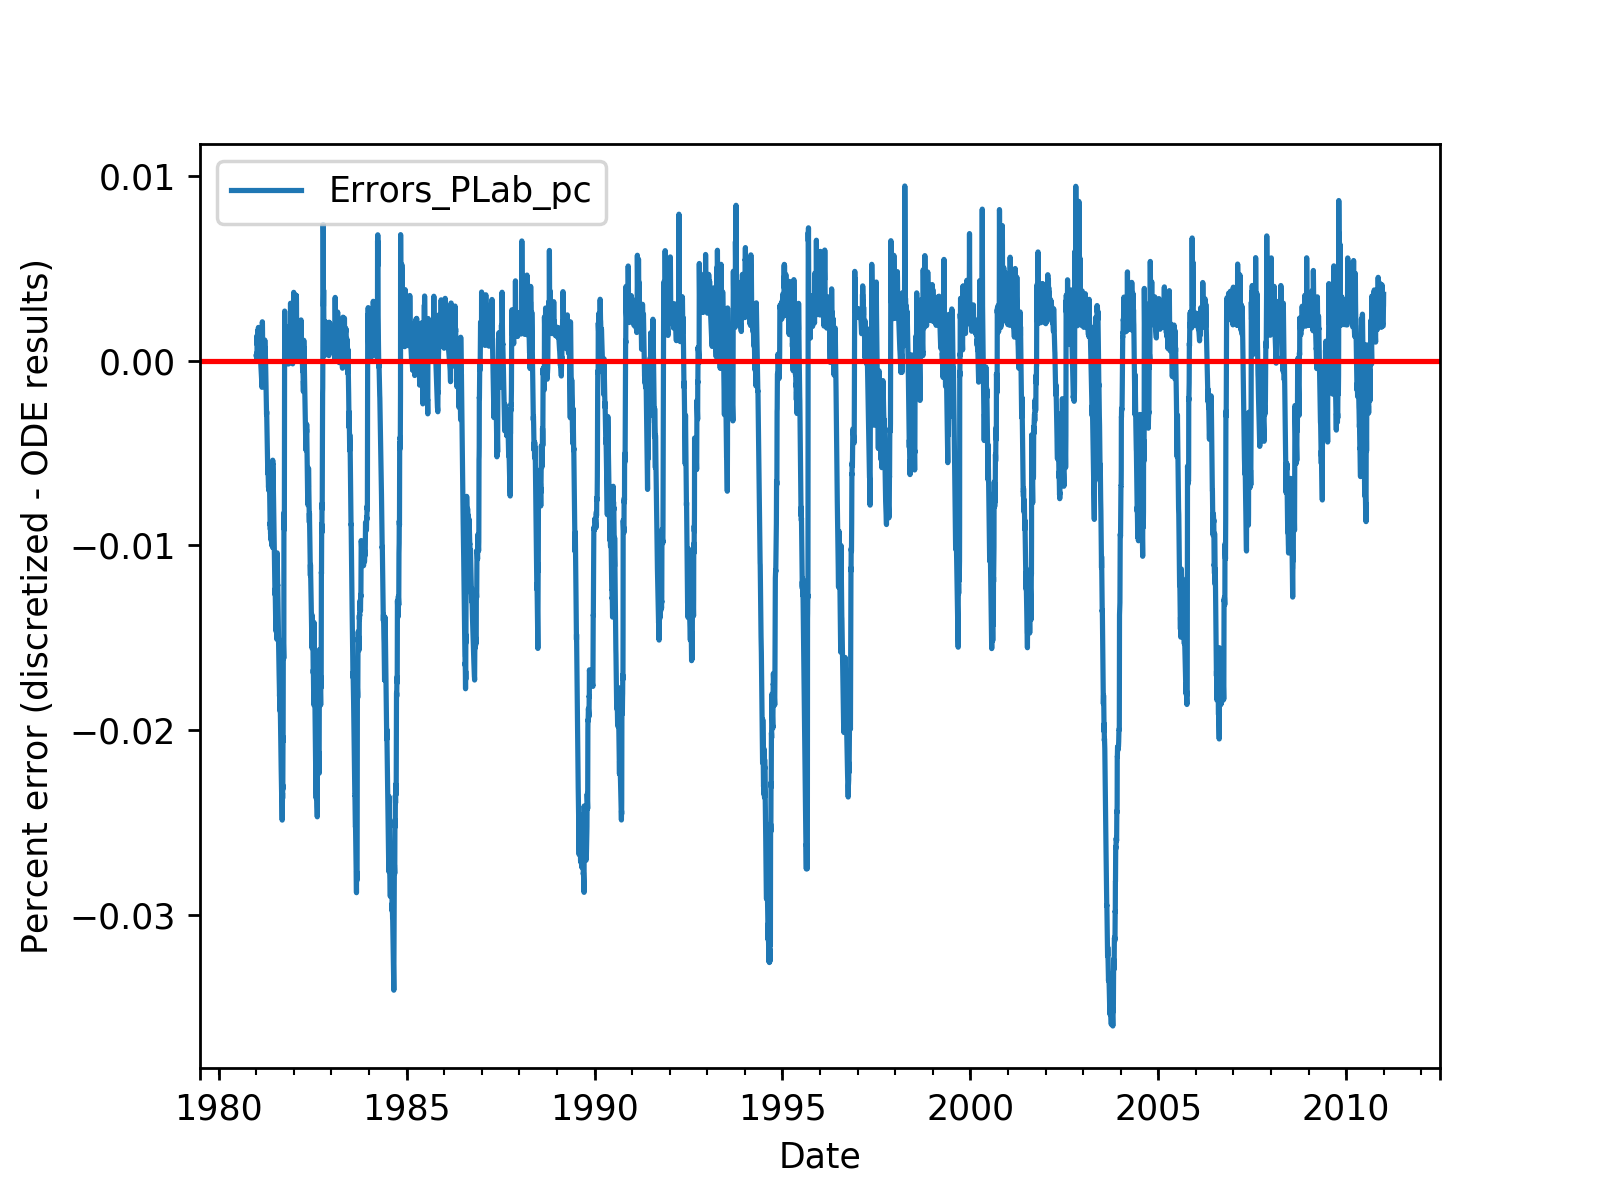

In [9]:
disc_df['Errors_PLab_pc'] = 100*(disc_df['P_labile_A_disc'] - disc_df['P_labile_A'])/disc_df['P_labile_A']
disc_df[['Errors_PLab_pc']].plot()
plt.axhline(y=0., color='r', linestyle='-')
plt.ylabel('Percent error (discretized - ODE results)')

<IPython.core.display.Javascript object>


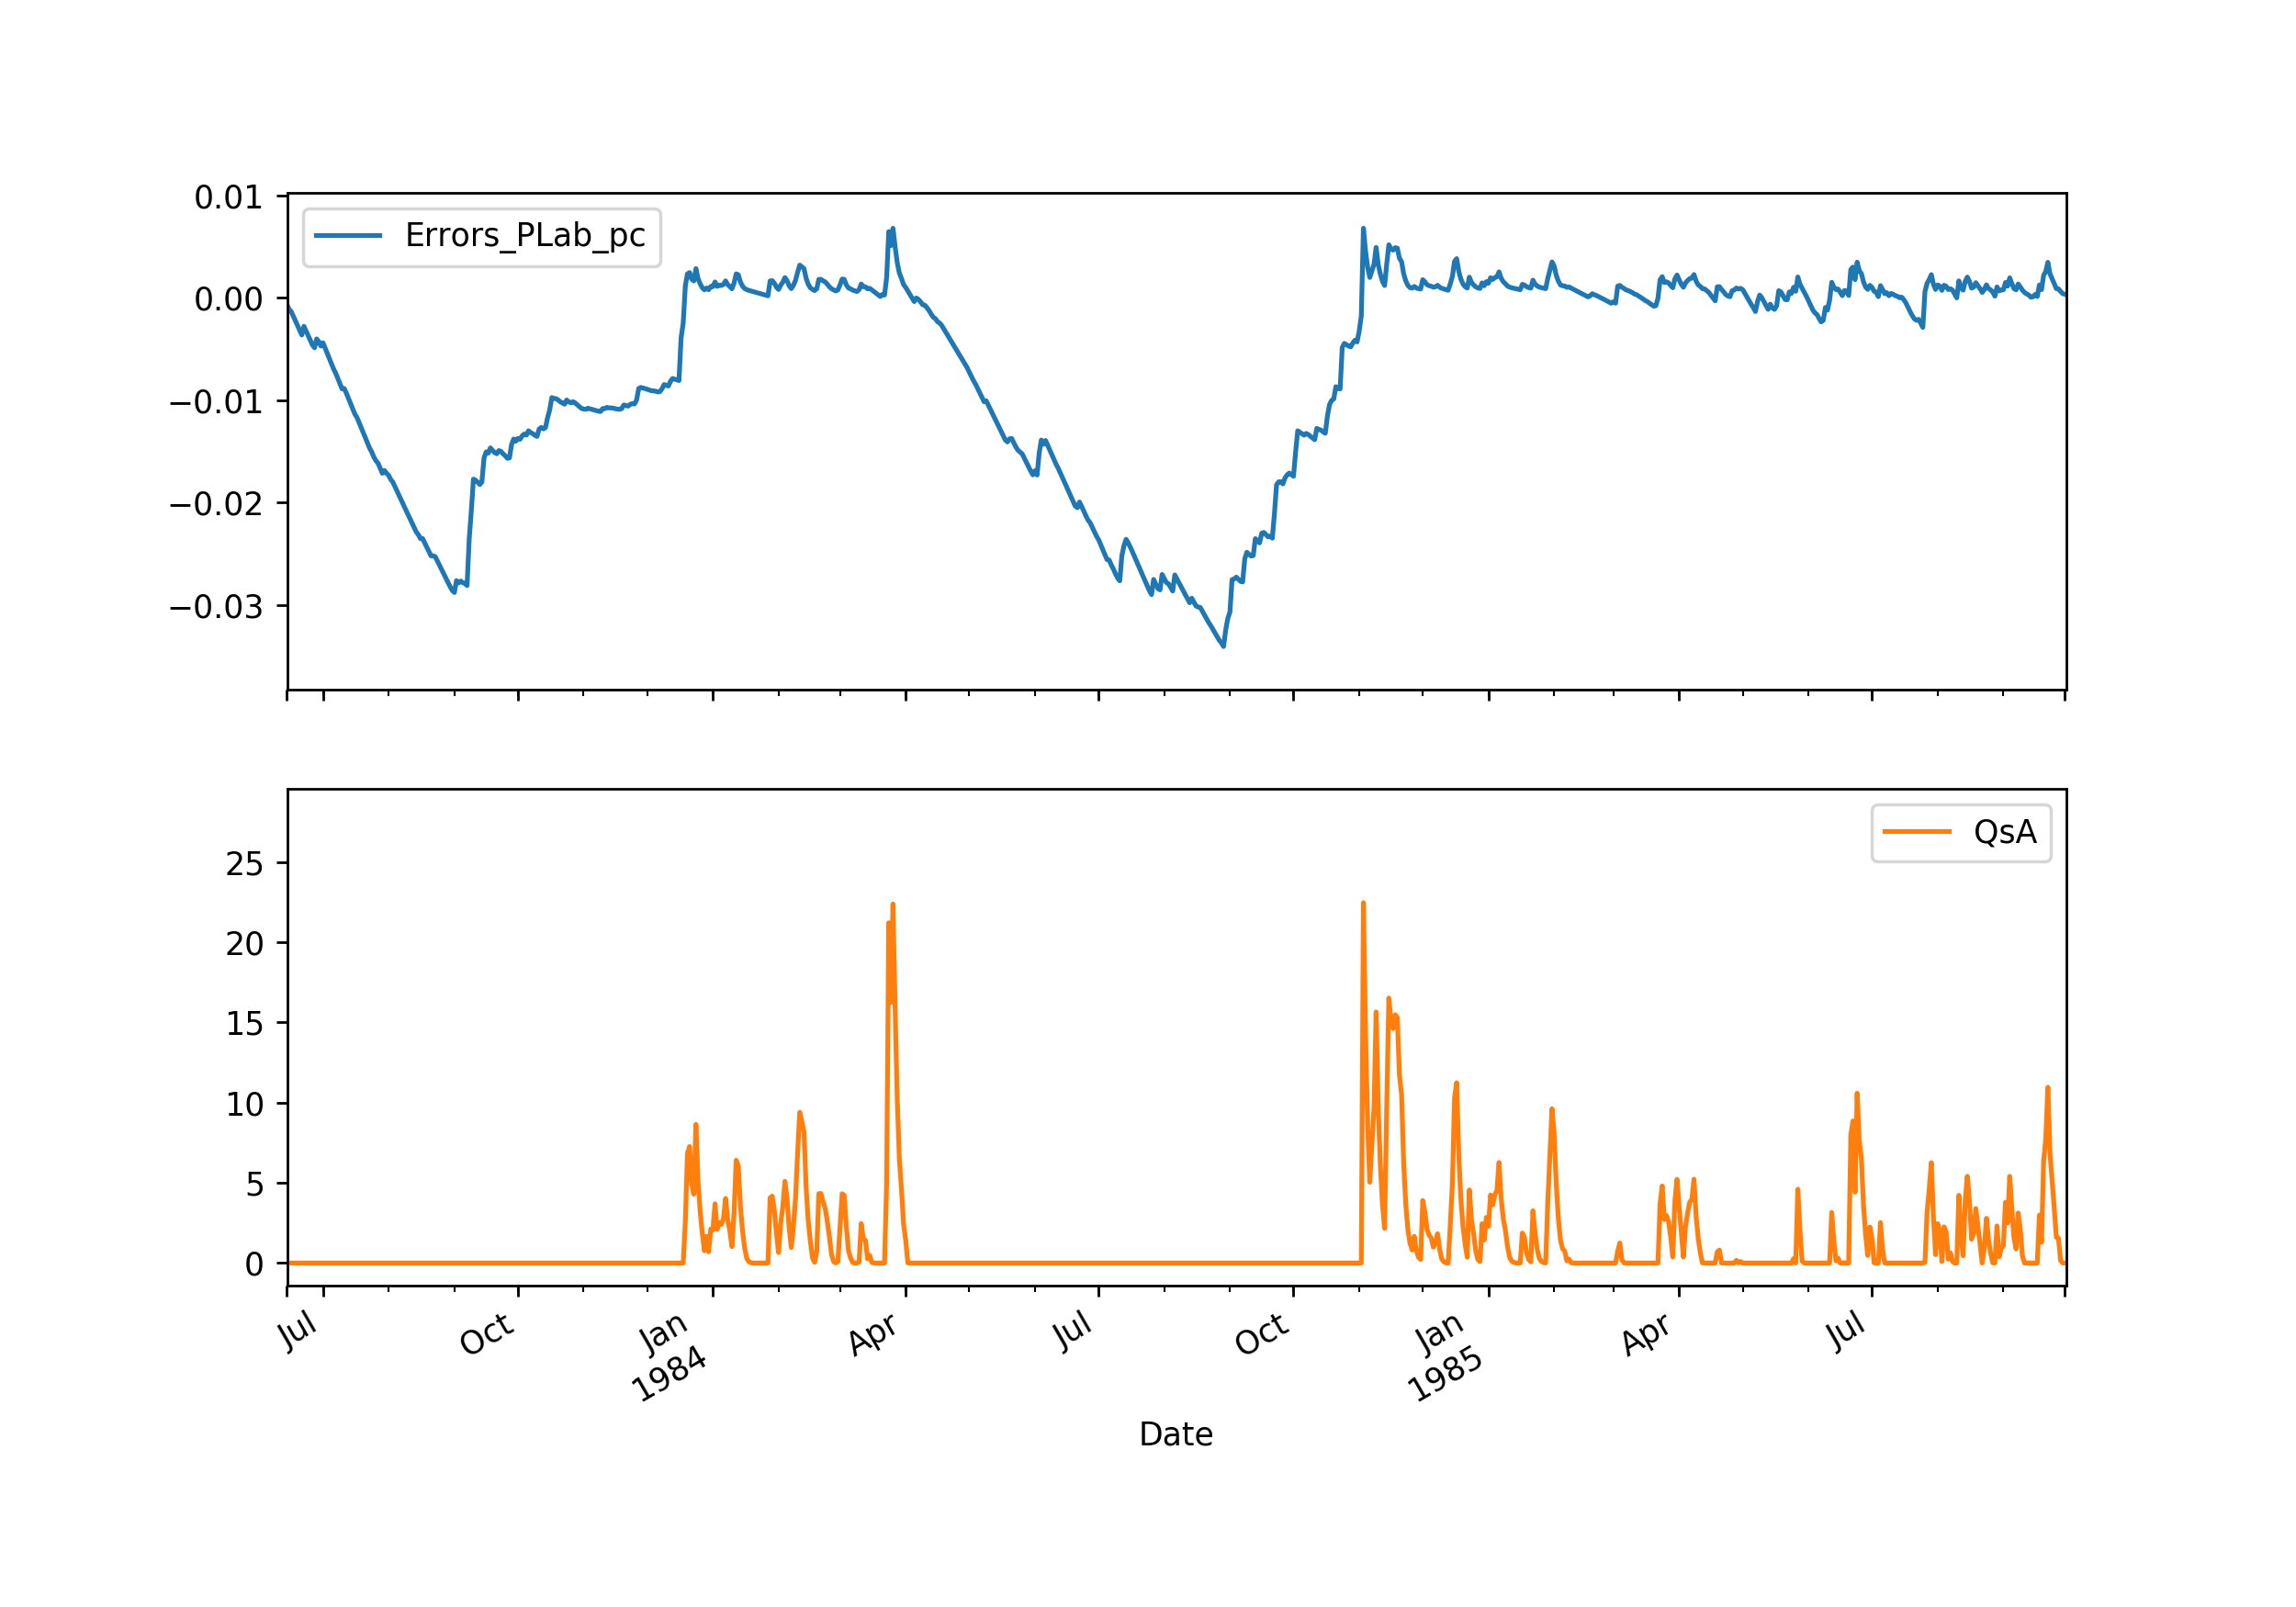

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000242DC2B0>,
      dtype=object)

In [7]:
disc_df['Errors_PLab_pc'] = 100*(disc_df['P_labile_A_disc'] - disc_df['P_labile_A'])/disc_df['P_labile_A']
disc_df[['Errors_PLab_pc','QsA']].plot(subplots=True, figsize=(10,7))
# plt.axhline(y=0., color='r', linestyle='-')
# plt.ylabel('Percent error (discretized - ODE results)')

In [18]:
RMSE = np.sqrt(np.mean((disc_df['P_labile_A_disc'] - disc_df['P_labile_A'])**2))
rel_RMSE = 100*RMSE/np.mean(disc_df['P_labile_A'])
MAE = np.mean(disc_df['Errors_PLab_pc'])

print "RMSE: %s" %RMSE
print "RMSE, as percentage of mean labile P output from ODE: %s" %rel_RMSE
print 'Mean percentage error: %s' %MAE


RMSE: 305.2524172407096
RMSE, as percentage of mean labile P output from ODE: 0.008442092909750521
Mean percentage error: -0.003115038157564583


Over 30 years: Error in labile soil P from discretization is always within +/- 0.04% of the ODE result. No long-term trend in errors or accumulation of errors. Tiny positive errors when there is soil water flow. Slightly larger negative errors when soil water volume drops below field capacity. But tiny compared to other model uncertainties.